L17 - Define the NN

going to solve the Burgers Equation 

In [9]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.image as mping



In [10]:
from tqdm import tqdm
import torch
import torch.nn as nn

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\derek\AppData\Local\Temp\ipykernel_18380\2514482294.py:1: SyntaxWarning: invalid escape sequence '\L'
  image = mping.imread('images\L17_F1.png')


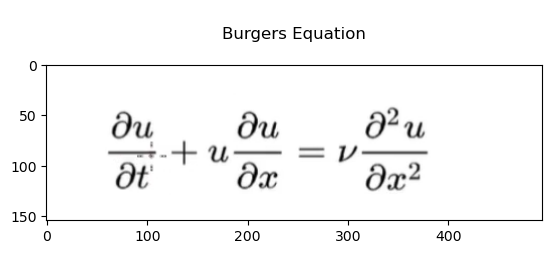

In [11]:
image = mping.imread('images\L17_F1.png')
plt.imshow(image)
plt.title('\nBurgers Equation\n')
plt.axis('on')
plt.show()

In [12]:
# building the network in x and t - provide us the u value

class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.net = torch.nn.Sequential(
            nn.Linear(2,20), # 2 inputs and expands to 20 inputs are x and t - then expand to 20 elements 
            nn.Tanh(), # activiation function 
            nn.Linear(20,30), # then 20 neurons will expand to 30 
            nn.Tanh(),
            nn.Linear(30,30),
            nn.Tanh(),
            nn.Linear(30,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,1),
        )                    
        
    def forward(self,x):
        out = self.net(x)
        return out



<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\derek\AppData\Local\Temp\ipykernel_18380\3855304821.py:1: SyntaxWarning: invalid escape sequence '\L'
  image = mping.imread('images\L17_F2.png')


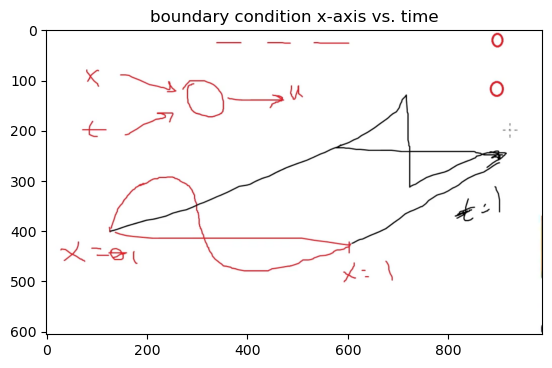

In [16]:
image = mping.imread('images\L17_F2.png')
plt.imshow(image)
plt.title('boundary condition x-axis vs. time')
plt.axis('on')
plt.show()

In [18]:
# L18 
# define the data - boundary condition and initial condition 

class Net:
    def __init__(self):
        device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        # define the computational network - gpu or cpu 
        # define computational domain 

        self.h = 0.1 # step size of x 
        self.k = 0.1 # step size of t
        x = torch.arange(-1, 1+self.h, self.h) # x starts at -1 the +self.h is to get the last value i.e. 1
        t = torch.arange(0, 1+self.k, self.k) # time starts at zero

        self.X = torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T # transpose to get a tensor with x in the 1st column and t in the second column

        # assigning the training data
        # two boundary condition
        # bc1 is left - is a sin function 
        # bc2 is the right 
        # x-axis is from -1 to +1
        # y-axis is y=function(sin)
        bc1 = torch.stack(torch.meshgrid(x[0],t)).reshape(2,-1).T # x[0] because dealing with boundary condition
        bc2 = torch.stack(torch.meshgrid(x[-1],t)).reshape(2,-1).T # x[-1] is the last element 
        ic = torch.stack(torch.meshgrid(x,t[0])).reshape(2,-1).T # time at zero for all x
        
        self.X_train = torch.cat([bc1,bc2,ic]) # these are the points at BC and IC
        y_bc1 = torch.zeros(len(bc1)) # initializing y as zero
        y_bc2 = torch.zeros(len(bc2)) # initializing y as zero 
        y_ic = -torch.sin(math.pi*ic[:,0]) # using only the x element of ic and -torch... is minus to start from positive
    
        self.y_train = torch.cat([y_bc1,y_bc2,y_ic])
        self.y_train = self.y_train.unsqueeze(1)